In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from os import path
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [27]:
data = pd.read_csv('spotify_ver5_all.csv')

### release_date 以年表示

In [28]:
tem = []
for i in range(data.shape[0]):
    tem.append(data['release_date'][i].split('-')[0])
data['release_date'] = tem
data.head()

,name,id,popularity,duration_ms,release_date,artist_name,artist_id,genres,artist_followers_num,artist_popularity,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,Yellow,3AJwUDP919kvQ9QcozQPxg,83,266773,2000,Coldplay,4gzpq5DPGxSnKTe4SA8HAU,permanent wave,23551766.0,93,...,0.234,-7.227,1.0,0.0281,173.365,4.0,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,audio_features,spotify:track:3AJwUDP919kvQ9QcozQPxg,0.285
1,後來,2wzXhxWPX0aODraKNXoJYY,58,341400,2000,Rene Liu,6qzfo7jiO4OrhxrvPFPlWX,c-pop,70961.0,52,...,0.174,-8.285,1.0,0.0265,149.784,4.0,https://api.spotify.com/v1/tracks/2wzXhxWPX0aO...,audio_features,spotify:track:2wzXhxWPX0aODraKNXoJYY,0.375
2,開始懂了,68tZwwRuo9ip5gRQFG1XWF,51,271493,2000,Stefanie Sun,0SIXZXJCAhNU8sxK0qm7hn,c-pop,225232.0,62,...,0.110,-6.909,0.0,0.0290,117.933,4.0,https://api.spotify.com/v1/tracks/68tZwwRuo9ip...,audio_features,spotify:track:68tZwwRuo9ip5gRQFG1XWF,0.151
3,可愛女人,14JlPNX0Z1JM7Mwfou6Xlf,45,239026,2000,Jay Chou,2elBjNSdBE2Y3f0j1mjrql,c-pop,1355834.0,77,...,0.188,-9.985,1.0,0.0306,135.446,4.0,https://api.spotify.com/v1/tracks/14JlPNX0Z1JM...,audio_features,spotify:track:14JlPNX0Z1JM7Mwfou6Xlf,0.916
4,星晴,5ZcRLLJSbTPdKMikgdMNX9,45,259399,2000,Jay Chou,2elBjNSdBE2Y3f0j1mjrql,c-pop,1355834.0,77,...,0.224,-10.374,1.0,0.0311,88.966,4.0,https://api.spotify.com/v1/tracks/5ZcRLLJSbTPd...,audio_features,spotify:track:5ZcRLLJSbTPdKMikgdMNX9,0.240


### overall top artist
artist_popularity > 75% 才算popular

In [29]:
data.describe()

,popularity,duration_ms,artist_followers_num,artist_popularity,acousticness,danceability,duration_ms.1,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,176047.000000,1.760470e+05,1.760470e+05,176047.000000,176047.000000,176047.000000,1.760470e+05,176047.000000,176047.000000,176047.000000,176047.000000,176047.000000,176047.000000,176047.000000,176047.000000,176047.000000,176047.000000
mean,35.967980,2.350834e+05,1.060768e+06,56.432873,0.403164,0.557273,2.350796e+05,0.566080,0.133701,5.225735,0.208093,-9.057475,0.683687,0.088191,119.173280,3.883253,0.473903
std,15.642616,1.038152e+05,3.576694e+06,17.561717,0.343323,0.170649,1.038083e+05,0.261969,0.297799,3.547906,0.192154,5.584818,0.465038,0.144963,30.397319,0.454023,0.260729
min,1.000000,2.388200e+04,0.000000e+00,0.000000,0.000000,0.000000,7.229000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,1.908930e+05,1.326900e+04,45.000000,0.064700,0.447000,1.908920e+05,0.371000,0.000000,2.000000,0.097400,-11.025500,0.000000,0.032900,95.143500,4.000000,0.256000
50%,35.000000,2.266660e+05,9.394300e+04,57.000000,0.333000,0.570000,2.266670e+05,0.586000,0.000007,5.000000,0.126000,-7.467000,1.000000,0.042300,118.990000,4.000000,0.455000
75%,46.000000,2.667860e+05,5.497600e+05,69.000000,0.722000,0.682000,2.667870e+05,0.789000,0.006650,8.000000,0.253000,-5.338000,1.000000,0.069700,138.147000,4.000000,0.684000
max,100.000000,4.725263e+06,5.598031e+07,100.000000,0.996000,0.986000,4.725264e+06,1.000000,1.000000,11.000000,1.000000,1.951000,1.000000,0.970000,236.241000,5.000000,1.000000


In [30]:
df_desc = data.describe()

In [31]:
# 權重計算
tlist = data[data.artist_popularity.values>=df_desc['artist_popularity']['75%']][['artist_popularity','artist_name']]
tlist.index =data[data.artist_popularity.values>=df_desc['artist_popularity']['75%']].artist_name
tlist = tlist.drop_duplicates(['artist_name'])
tlist = tlist['artist_popularity']
print(type(tlist))
tlist.sort_values(ascending=False)

<class 'pandas.core.series.Series'>


artist_name
Post Malone      100
Drake             99
J Balvin          99
Bad Bunny         98
Ozuna             98
                ... 
Nils Frahm        69
Tenacious D       69
Coolio            69
Bomba Estéreo     69
Kasabian          69
Name: artist_popularity, Length: 2037, dtype: int64

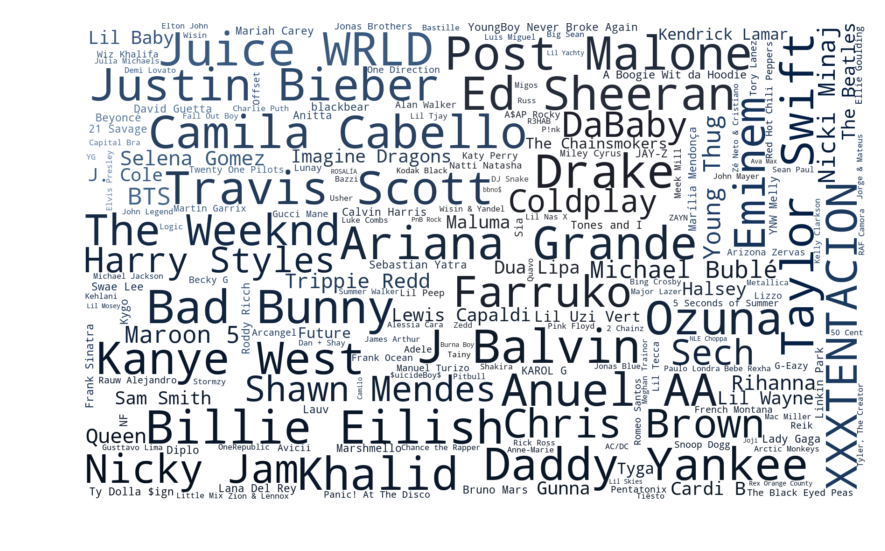

In [32]:
from PIL import Image
import os
from os import path
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
string=' '.join(data[data.artist_popularity.values>=df_desc['artist_popularity']['75%']].artist_name)
plt.figure(dpi=150) 
# 設定字體（要能支援中文顯示的）
font_path = '/System/Library/Fonts/PingFang.ttc'  
# 讀背景圖片
#background_Image = np.array(Image.open("spotify-holiday-goals-fi-2018-1320x660.jpg"))
background_Image = np.array(Image.open("1.png"))
# 提取背景圖片顏色
img_colors = ImageColorGenerator(background_Image)
# 設置stopwords 
stopwords = set(STOPWORDS)
#stopwords.add('object')           #如果有顯眼的無關詞，要加入到stopword
wc = WordCloud(
        #font_path = font_path,    # 字體路徑
        margin = 2,                # 頁面邊緣
        mask = background_Image,
        #scale = 3,
        max_words = 200,          # 最多顯示多少詞
        min_font_size = 4,        # 最小的字的字體大小
        stopwords = stopwords,
        random_state = 42,
        background_color = 'white', # 背景颜色
        max_font_size = 100,
)
#wc.generate(string)
wc.generate_from_frequencies(tlist)
wc.recolor(color_func = img_colors)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()    

In [33]:
# 權重計算
tlist2 = data[data.popularity.values>=df_desc['popularity']['75%']][['popularity','name']]
tlist2.index =data[data.popularity.values>=df_desc['popularity']['75%']].name
tlist2 = tlist2.drop_duplicates(['name'])
tlist2 = tlist2['popularity']
print(type(tlist2))
tlist.sort_values(ascending=False)

<class 'pandas.core.series.Series'>


artist_name
Post Malone      100
Drake             99
J Balvin          99
Bad Bunny         98
Ozuna             98
                ... 
Nils Frahm        69
Tenacious D       69
Coolio            69
Bomba Estéreo     69
Kasabian          69
Name: artist_popularity, Length: 2037, dtype: int64

In [ ]:
from PIL import Image
import os
from os import path
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
string=' '.join(data[data.popularity.values>=df_desc['popularity']['75%']].name)
plt.figure(dpi=150) 
# 設定字體（要能支援中文顯示的）
font_path = '/System/Library/Fonts/PingFang.ttc'  
# 讀背景圖片
#background_Image = np.array(Image.open("spotify-holiday-goals-fi-2018-1320x660.jpg"))
background_Image = np.array(Image.open("1.png"))
# 提取背景圖片顏色
img_colors = ImageColorGenerator(background_Image)
# 設置stopwords 
stopwords = set(STOPWORDS)
#stopwords.add('object')           #如果有顯眼的無關詞，要加入到stopword
wc = WordCloud(
        #font_path = font_path,    # 字體路徑
        margin = 2,                # 頁面邊緣
        mask = background_Image,
        #scale = 3,
        max_words = 200,          # 最多顯示多少詞
        min_font_size = 6,        # 最小的字的字體大小
        stopwords = stopwords,
        random_state = 31,
        background_color = 'white', # 背景颜色
        max_font_size = 100,
)
#wc.generate(string)
wc.generate_from_frequencies(tlist2)
wc.recolor(color_func = img_colors)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()    